#Support Vector Machines (SVM) Introduction - Machine Learning

* Tutorial: https://news.towardsai.net/svm
* Github: https://github.com/towardsai/tutorials/tree/master/support-vector-machine-svm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#classic datasets from sklearn library
from sklearn import datasets

from sklearn.model_selection import train_test_split

#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC

#different matrices to score model performance
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

## Load data

In [ ]:
#loading WINE dataset
cancer_data = datasets.load_wine()

#converting into DataFrame
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
df['target'] = cancer_data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Exploratory data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


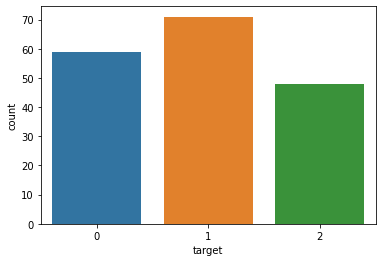

In [ ]:
#analysing target variable 
sns.countplot(df.target)
plt.show()

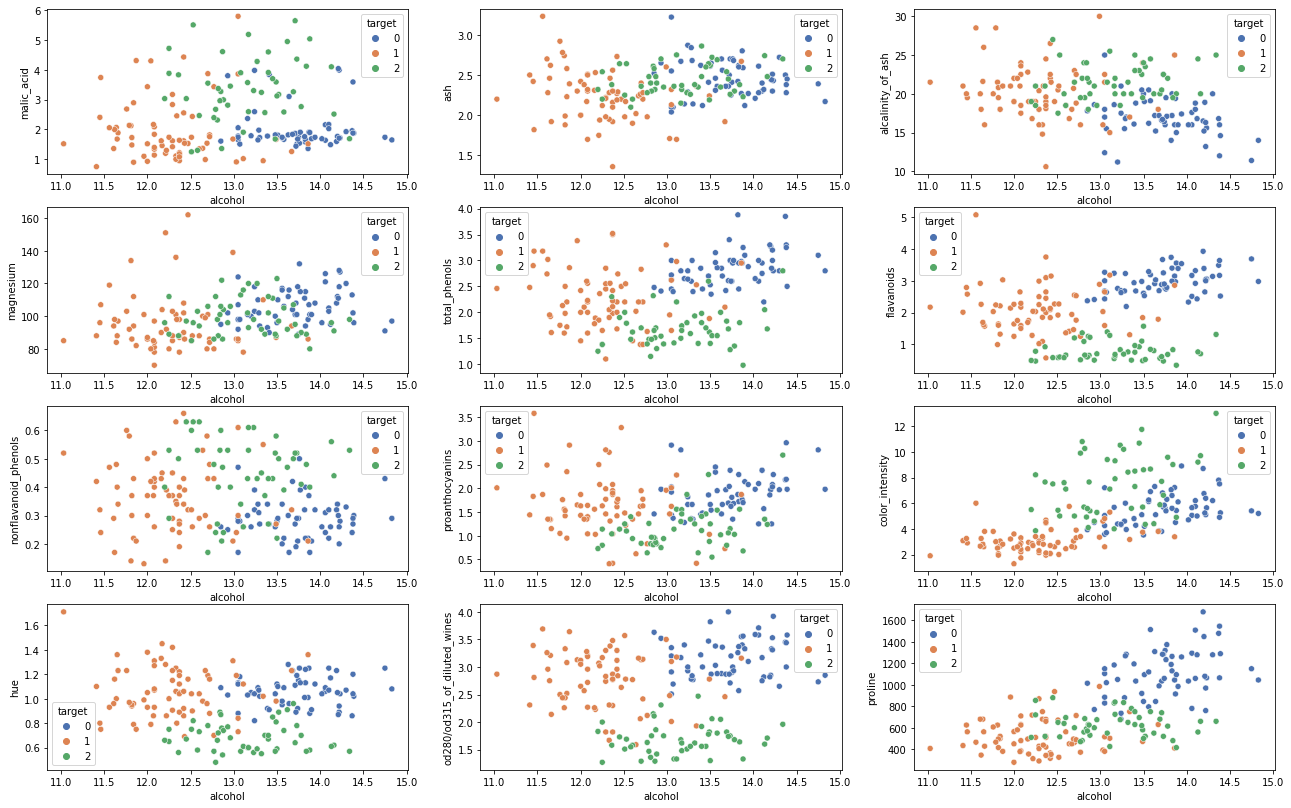

In [ ]:
#visualizing datapoints seperability
fig, axes = plt.subplots(4, 3, figsize=(22,14))
axes = [ax for axes_rows in axes for ax in axes_rows]
columns = list(df.columns)
columns.remove('target')
columns.remove('alcohol')

#looping through every columns of data
#and plotting against alcohol
for i, col in enumerate(columns):
  sns.scatterplot(data=df, x='alcohol', y=col, hue='target', palette="deep", ax=axes[i])

## Splitting data

In [ ]:
#splitting data into 80:20 train test ratio
X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Model training and performance evaluation

In [ ]:
#training SVM model with linear kernel
model = SVC(kernel='linear',random_state = 10)
model.fit(X_train, y_train)

#predicting output for test data
pred = model.predict(X_test)

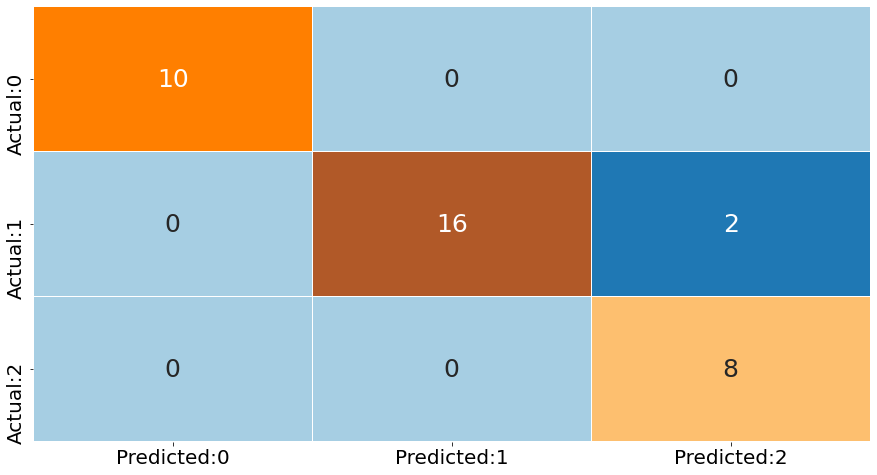

In [ ]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)

#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]

#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1', 'Predicted:2'], index = ['Actual:0','Actual:1', 'Actual:2'])

#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94        18
           2       0.80      1.00      0.89         8

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.96      0.94      0.95        36

